In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = 'mnist_hw.csv'
df = pd.read_csv(file_path)

# Separate Input and Output
X = df.drop(columns=['target'])
y = df['target']

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
# Check the number of samples in the full dataset
X.shape[0]

1797

## Problem 1: MDS

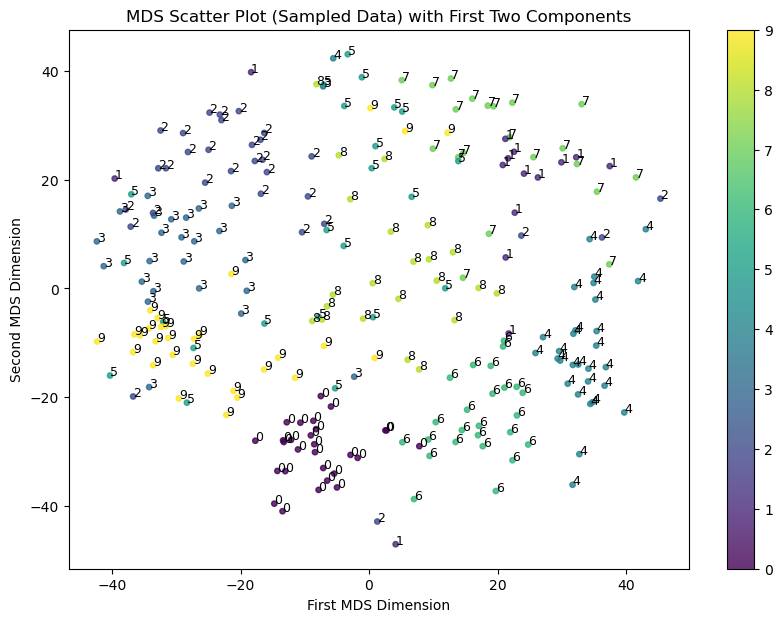

In [4]:
# MDS with original data
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X)

# Choose the samples from the MDS result
X_sample = np.random.choice(len(mds_result), size = 250, replace = False)
mds_sample = mds_result[X_sample]
y_sample = y.iloc[X_sample]

# Create an MDS scatter plot for the sampled data
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(mds_sample[:, 0], mds_sample[:, 1], c=y_sample, cmap='viridis', s=15, alpha=0.8)
plt.title('MDS Scatter Plot (Sampled Data) with First Two Components')
plt.xlabel('First MDS Dimension')
plt.ylabel('Second MDS Dimension')

# Adding labels for the sampled MDS plot
for i, label in enumerate(y_sample):
    plt.text(mds_sample[i, 0], mds_sample[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_mds)
plt.show()

## Problem 2: IsoMAP

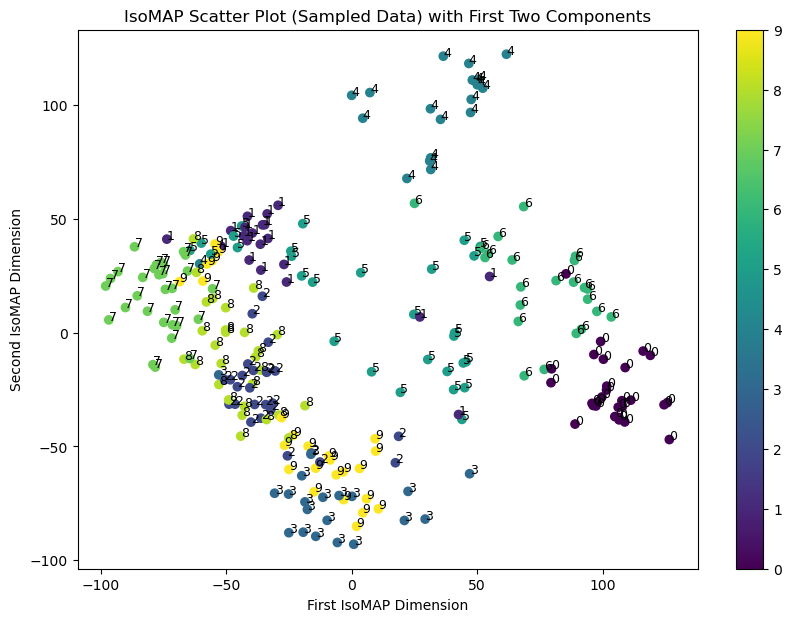

In [5]:
# IsoMAP with original data
isomap = Isomap(n_neighbors=10, n_components=2)
iso_result = isomap.fit_transform(X)

# Choose the samples from the IsoMap result
X_sample = np.random.choice(len(iso_result), size = 250, replace = False)
iso_sample = iso_result[X_sample]
y_sample = y.iloc[X_sample]

# Create an IsoMAP scatter plot for the sampled data
plt.figure(figsize=(10, 7))
scatter_isomap = plt.scatter(iso_sample[:, 0], iso_sample[:, 1], c=y_sample, cmap='viridis')
plt.title('IsoMAP Scatter Plot (Sampled Data) with First Two Components')
plt.xlabel('First IsoMAP Dimension')
plt.ylabel('Second IsoMAP Dimension')

# Adding labels for the sampled IsoMAP plot
for i, label in enumerate(y_sample):
    plt.text(iso_sample[i, 0], iso_sample[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_isomap)
plt.show()

## Problem 3: LLE

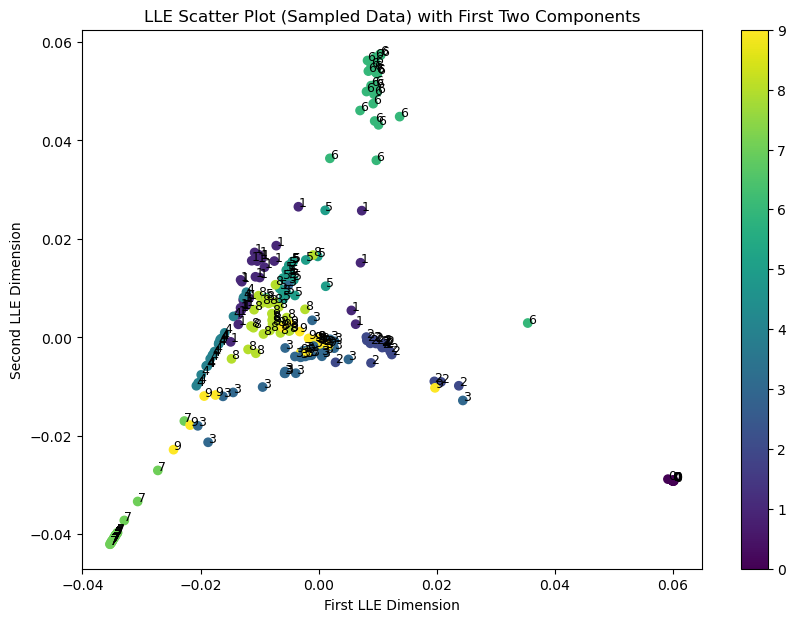

In [6]:
# LLE with original data
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2)
lle_result = lle.fit_transform(X)

# Choose the samples from the LLE result
X_sample = np.random.choice(len(lle_result), size=250, replace=False)
lle_sample = lle_result[X_sample]
y_sample = y.iloc[X_sample]

# Create an LLE scatter plot for the sampled data
plt.figure(figsize=(10, 7))
scatter_lle = plt.scatter(lle_sample[:, 0], lle_sample[:, 1], c=y_sample, cmap='viridis')
plt.title('LLE Scatter Plot (Sampled Data) with First Two Components')
plt.xlabel('First LLE Dimension')
plt.ylabel('Second LLE Dimension')

# Adding labels for the sampled LLE plot
for i, label in enumerate(y_sample):
    plt.text(lle_sample[i, 0], lle_sample[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_lle)
plt.show()


## Problem 4: t-SNE

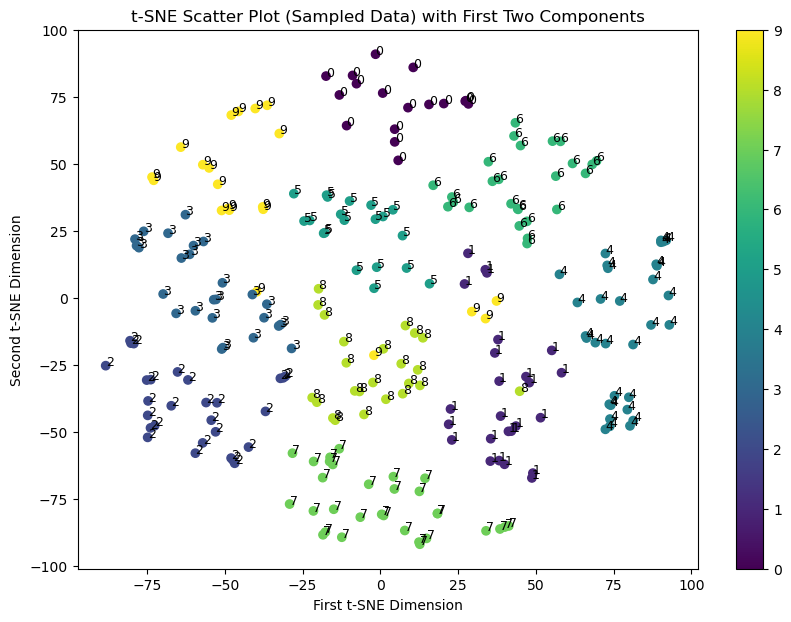

In [7]:
# t-SNE with original data
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_result = tsne.fit_transform(X)

# Choose the samples from the t-SNE result
X_sample = np.random.choice(len(tsne_result), size=250, replace=False)
tsne_sample = tsne_result[X_sample]
y_sample = y.iloc[X_sample]

# Create an t_SNE scatter plot for the sampled data
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1], c=y_sample, cmap='viridis')
plt.title('t-SNE Scatter Plot (Sampled Data) with First Two Components')
plt.xlabel('First t-SNE Dimension')
plt.ylabel('Second t-SNE Dimension')

# Adding labels for the sampled t-SNE
for i, label in enumerate(y_sample):
    plt.text(tsne_sample[i, 0], tsne_sample[i, 1], str(label), fontsize=9)

plt.colorbar(scatter_tsne)
plt.show()


## Problem 5

| Label 0 | Close | Far |
|----------|----------|----------|
| IsoMAP | 6 | 7 |
| LLE | 2 | 7 |
| t-SNE | 6 | 7 |

### Explaination

##### Close Labels: Digits 2 and 6 are found to be close to 0 (a rounded loop-like structure) in the reduced space. These digits share curved structures or loops that resemble parts of "0."  

##### Far Labels: Digit 7 is placed far away from 0 This is because the straight, angular structure of 7 contrasts with the roundness of 0.

| Label 1 | Close | Far |
|----------|----------|----------|
| IsoMAP | 5 | 0 |
| LLE | 4 | 0 |
| t-SNE | 4 | 3 |

### Explaination

##### Close Labels: Digits 4 and 5 are found to be close to 1 (a straight line structure) in the reduced space. These digits share straight lines that resemble parts of 1.

##### Far Labels: Digits 0 and 3 are placed far away from 1. This is because the rounded or curved structure of these digits contrasts with the straight lines of 1. 

| Label 2 | Close | Far |
|----------|----------|----------|
| IsoMAP | 8 | 4 |
| LLE | 3 | 0 |
| t-SNE | 3 | 4 |

### Explaination
##### Close Labels: Digits 3 and 8 are found to be close to 2 (a curved structure) in the reduced space. These digits share curves or loops that resemble parts of 2.
##### Far Labels: Digits 0 and 4 are placed far away from 2. This is because the rounded shape of 0 and the angular structure of 4 contrast with the curves of 2.







| Label 3 | Close | Far |
|----------|----------|----------|
| IsoMAP | 9 | 4 |
| LLE | 9 | 0 |
| t-SNE | 2 | 4 |

### Explaination

##### Close Labels: Digits 2 and 9 are found to be close to 3 (a rounded structure with loops) in the reduced space. These digits share curved structures that resemble parts of 3.
##### Far Labels: Digits 0 and 4 are placed far away from 3. This is because the rounded shape of 0 and the angular, straight structure of 4 contrast with the curves of 3.







| Label 4 | Close | Far |
|----------|----------|----------|
| IsoMAP | 5 | 3 |
| LLE | 1 | 0 |
| t-SNE | 1 | 3 |

### Explaination

##### Close Labels: Digits 1 and 5 are found to be close to 4 (an angular structure) in the reduced space. These digits share straight lines or angular shapes that resemble parts of 4.
##### Far Labels: Digits 0 and 3 are placed far away from 4. This is because the rounded or curved structure of these digits contrasts with the angular, straight lines of 4.

| Label 5 | Close | Far |
|----------|----------|----------|
| IsoMAP | 6 | 0 |
| LLE | 8 | 0 |
| t-SNE | 6 | 4 |

### Explaination

##### Close Labels: Digits 6 and 8 are found to be close to 5 (a curved and angular structure) in the reduced space. These digits share similar shapes, with curves and angular components that resemble parts of 5.
##### Far Labels: Digits 0 and 4 are placed far away from 5. This is because the fully rounded shape of 0 and the more angular, straight structure of 4 contrast with the mixed curve-angular structure of 5.







| Label 6 | Close | Far |
|----------|----------|----------|
| IsoMAP | 0  | 7 |
| LLE | 5 | 7 |
| t-SNE | 5 | 2 |

### Explaination

##### Close Labels: Digits 0 and 5 are found to be close to 6 (a rounded and loop-like structure) in the reduced space. These digits share curved or rounded shapes that resemble parts of 6.
##### Far Labels: Digits 2 and 7 are placed far away from 6. This is because the angular structure of 7 and the sharp curves of 2 contrast with the more rounded, continuous shape of 6.

| Label 7 | Close | Far |
|----------|----------|----------|
| IsoMAP | 8 | 0 |
| LLE | 3 | 0 |
| t-SNE | 8 | 0 |

### Explaination

##### Close Labels: Digits 3 and 8 are found to be close to 7 (a straight and angular structure) in the reduced space. These digits share straight or sharp angles that resemble parts of 7.
##### Far Labels: Digit 0 is placed far away from 7. This is because the rounded and loop-like structure of 0 contrasts with the angular, straight structure of 7.

| Label 8 | Close | Far |
|----------|----------|----------|
| IsoMAP | 7 | 0 |
| LLE | 5 | 0 |
| t-SNE | 8 | 0 |

### Explaination

##### Close Labels: Digits 5 and 7 are found to be close to 8 (a rounded, loop-like structure) in the reduced space. These digits share similar curved shapes or loops that resemble parts of 8.
##### Far Labels: Digit 0 is placed far away from 8. This is because the fully rounded shape of 0 contrasts with the more complex looped and angular structure of 8.







| Label 9 | Close | Far |
|----------|----------|----------|
| IsoMAP | 3 | 4 |
| LLE | 3 | 0 |
| t-SNE | 3 | 4 |

### Explaination

##### Close Labels: Digit 3 is found to be close to 9 (a curved structure with a loop) in the reduced space. These digits share similar curved shapes and loops that resemble parts of 9.
##### Far Labels: Digits 0 and 4 are placed far away from 9. This is because the fully rounded shape of 0 and the angular structure of 4 contrast with the curves and loops of 9.

## Survey for Extra Credit

####  1. How long does it take to finish this homework? 
#### Answer: It took me 5 hours to finish this homework.

#### 2. What problem was the easiest to implement?

#### Answer: IsoMAP, LLE, t-SNE were the easiest to implement.

####  3. What problem was the most difficult to implement and why?
####  Answer: MDS was the hardest because it was the first coding question, and the rest were similar as the MDS one.

#### 4. Do you have the confidence to implement all these algorithms to your real problems in the future?
#### Answer: Yes, I have confidence to implement all these algorithms to the future real problems. I am mastering feature extraction now.
